<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment11_based_on9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References- 

https://usmanr149.github.io/urmlblog/cnn/2020/05/01/Salincy-Maps.html

https://mydeeplearningnb.wordpress.com/2019/07/24/visualizing-cnns-using-tensorflow/

https://stackoverflow.com/questions/63107141/how-to-compute-saliency-map-using-keras-backend

In [226]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [227]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [228]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [229]:
train_images.shape

(60000, 28, 28)

In [230]:
len(train_labels)

60000

In [231]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [232]:
test_images.shape

(10000, 28, 28)

In [233]:
len(test_labels)

10000

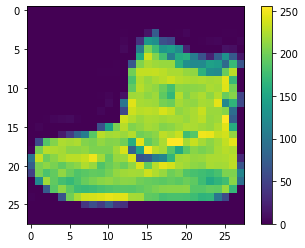

In [234]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [235]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [236]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [237]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [377]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [238]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6435 - accuracy: 0.7708
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3835 - accuracy: 0.8608
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3401 - accuracy: 0.8732
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3174 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2937 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2825 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2691 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9020
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2436 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.230

In [239]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3249 - accuracy: 0.8855

Test accuracy: 0.8855000138282776


In [296]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(tr_images, tr_labels), (ts_images, ts_labels) = fashion_mnist.load_data()

In [353]:
data = tf.data.Dataset.from_tensor_slices(
    (tr_images.astype(np.float32) / 255, tr_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(1).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (ts_images.astype(np.float32) / 255, ts_labels.astype(np.int32))).batch(128)

In [297]:
first_image = tr_images[0]
label=class_names[tr_labels[0]]

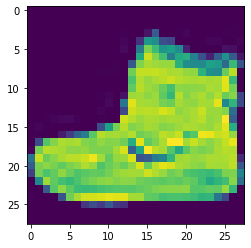

In [298]:
plt.figure()
plt.imshow(tr_images[0]) # To change [-1, 1] to [0,1]
plt.show()

In [299]:
first_image.shape

(28, 28)

In [300]:
#preprocess image to get it into the right format for the model
img = keras.preprocessing.image.img_to_array(first_image)
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)

In [247]:
layers = [layer.output for layer in model.layers]

In [248]:
import keras

In [302]:
img.shape

(1, 28, 28, 1)

In [301]:
images = tf.Variable(img, dtype=float)


In [254]:
with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)

In [255]:
grads.shape

TensorShape([1, 28, 28, 1])

In [256]:
dgrad_abs = tf.math.abs(grads)

In [264]:
dgrad_max_ = np.max(dgrad_abs,axis=-1)[0]

In [265]:
dgrad_max_.shape

(28, 28)

In [266]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

In [267]:
grad_eval.shape

(28, 28)

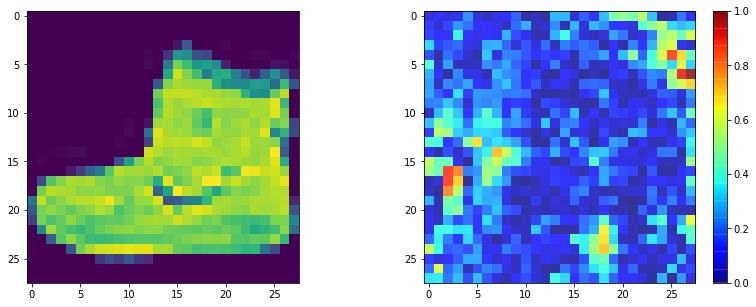

In [268]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(first_image)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

Activation Maximization

In [290]:
images.shape

TensorShape([1, 28, 28, 1])

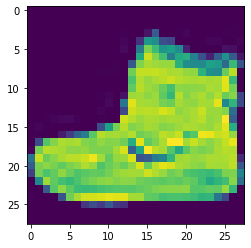

In [303]:
lt = np.squeeze(images)
plt.imshow(lt)

Original image


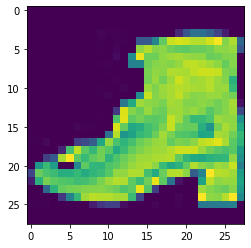

Optimal image


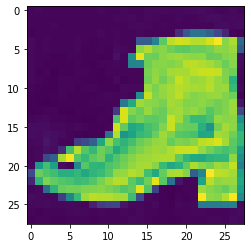

In [359]:
for i, (img_batch, lbl_batch) in enumerate(data):

  original = img_batch
  for step in range(20):
      with tf.GradientTape() as tape:
        tape.watch(img_batch)
        pred = model(img_batch, training=False)
        class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]

        loss = pred[0][class_idxs_sorted[0]]
      grads = tape.gradient(loss, img_batch)

      img_batch = img_batch + grads*0.001


  print('Original image')

  plt.imshow(original[0])
  plt.show()

  print('Optimal image')

  plt.imshow(img_batch[0])
  plt.show() 

  break

In [368]:
def my_fun(s,d):
  original = img_batch
  for step in range(20):
      with tf.GradientTape() as tape:
        tape.watch(d)
        pred = model(d, training=False)
        class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]

        loss = pred[0][class_idxs_sorted[0]]
      grads = tape.gradient(loss, d)

      d = d + grads*0.001
  return d[0]

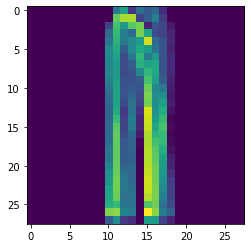

Optimal input for  100  training steps


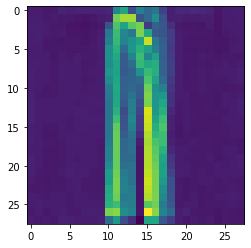

Optimal input for  200  training steps


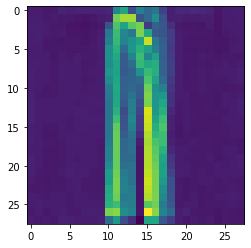

Optimal input for  300  training steps


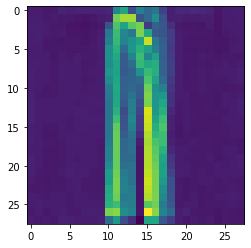

Optimal input for  400  training steps


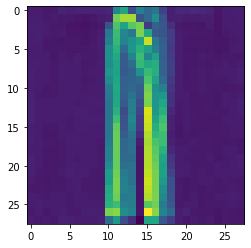

Optimal input for  500  training steps


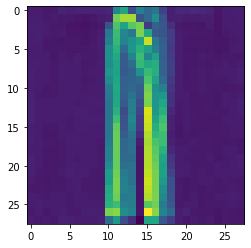

In [369]:
for i, (img_batch, lbl_batch) in enumerate(data):

  plt.imshow(img_batch[0])
  plt.show()

  for steps in range(100, 501, 100):
    print('Optimal input for ', steps, ' training steps')

    plt.imshow(my_fun(steps, img_batch))
    plt.show() 

  break

In [378]:
img_batch = tf.convert_to_tensor(np.random.uniform(low=0.0, high=1.0, size=(1,28,28)))

Optimal input for  100  training steps


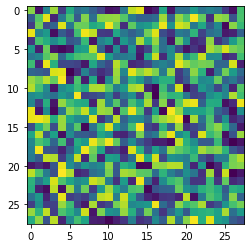

Optimal input for  200  training steps


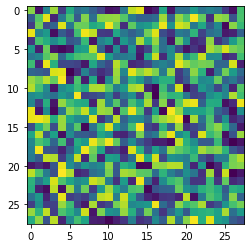

Optimal input for  300  training steps


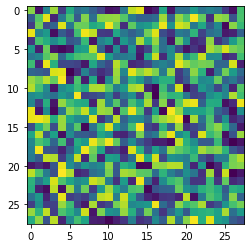

Optimal input for  400  training steps


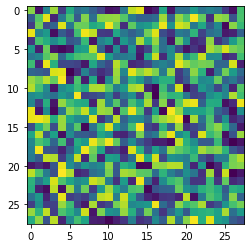

Optimal input for  500  training steps


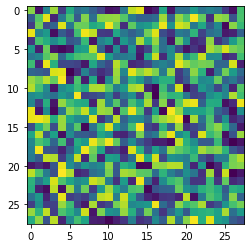

In [379]:
for steps in range(100, 501, 100):
  print('Optimal input for ', steps, ' training steps')
  plt.imshow(my_fun(steps, img_batch))
  plt.show() 